**Name : Dikshant Oswal**

*   Roll No : 37
*   ERP : 1132200219


In [8]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt


In [9]:

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [10]:

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [12]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [13]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(138.4185, grad_fn=<MseLossBackward>)
epoch 0, loss 138.41851806640625
tensor(11.5467, grad_fn=<MseLossBackward>)
epoch 1, loss 11.546738624572754
tensor(1.1953, grad_fn=<MseLossBackward>)
epoch 2, loss 1.195343255996704
tensor(0.3482, grad_fn=<MseLossBackward>)
epoch 3, loss 0.34818166494369507
tensor(0.2763, grad_fn=<MseLossBackward>)
epoch 4, loss 0.2762818932533264
tensor(0.2676, grad_fn=<MseLossBackward>)
epoch 5, loss 0.2676491141319275
tensor(0.2642, grad_fn=<MseLossBackward>)
epoch 6, loss 0.2642081379890442
tensor(0.2612, grad_fn=<MseLossBackward>)
epoch 7, loss 0.2612209916114807
tensor(0.2583, grad_fn=<MseLossBackward>)
epoch 8, loss 0.2583005428314209
tensor(0.2554, grad_fn=<MseLossBackward>)
epoch 9, loss 0.2554160952568054
tensor(0.2526, grad_fn=<MseLossBackward>)
epoch 10, loss 0.2525639832019806
tensor(0.2497, grad_fn=<MseLossBackward>)
epoch 11, loss 0.24974364042282104
tensor(0.2470, grad_fn=<MseLossBackward>)
epoch 12, loss 0.24695466458797455
tensor(0.2442, gr

[[ 0.432821 ]
 [ 2.5145   ]
 [ 4.5961785]
 [ 6.6778574]
 [ 8.759537 ]
 [10.841215 ]
 [12.9228945]
 [15.004574 ]
 [17.086252 ]
 [19.16793  ]
 [21.249609 ]]


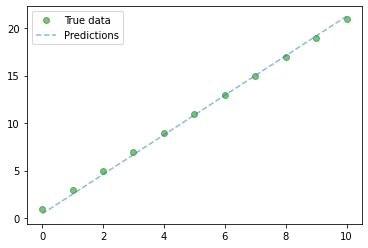

In [15]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()